**IMT2200 - Introducción a Ciencia de Datos**  
**Pontificia Universidad Católica de Chile**  
**Instituto de Ingeniería Matemática y Computacional**
**2025 - Segundo Semestre**

**Profesor:** Rodrigo A. Carrasco 

---

# 🩺 **Enfermedades respiratorias en urgencias: pre y post COVID-19**

---

###  **Integrantes**
- Santiago González  
- Fernanda Le Roy  
- Joab Vivanco  

---

📅 **Fecha de entrega inicial:** 21 de octubre de 2025  


---


## Contexto y motivación

La pandemia de **COVID-19** produjo un cambio radical en los patrones de consulta por enfermedades respiratorias en los servicios de urgencia.  
Antes del 2020, la frecuencia con la que se presentaban virus respiratorios como **influenza**, **virus sincicial** y **adenovirus** determinaba los flujos de pacientes.  

Sin embargo, tras las medidas de confinamiento, el uso de mascarillas y el cambio en conductas sociales, se observaron variaciones en la **incidencia y distribución** de estas patologías.

La motivación de este proyecto es analizar si, efectivamente, la pandemia **alteró la cantidad de atenciones por enfermedades respiratorias en urgencias** y si estas modificaciones se han mantenido en los años posteriores al confinamiento.  

El problema es relevante porque los servicios de urgencia deben **planificar sus recursos humanos y materiales** de acuerdo con la demanda, y comprender estas tendencias puede facilitar la preparación frente a **futuras crisis sanitarias**.

La **audiencia objetivo** de este análisis son principalmente las **autoridades de salud pública** (Ministerio de Salud, Servicios de Salud regionales) y los **equipos de gestión hospitalaria**, quienes requieren información basada en datos para optimizar políticas de prevención, campañas de vacunación y asignación de recursos. [1]


## Objetivos y preguntas de investigación

### Objetivo general

Analizar la **evolución de las consultas por enfermedades respiratorias en servicios de urgencia en Chile**, comparando el periodo previo y posterior a la pandemia de COVID-19, para identificar **tendencias y cambios significativos**.

---

### Objetivos específicos

- Describir la **incidencia de patologías respiratorias** atendidas en urgencias en la última década.  
- Comparar la **distribución temporal** de estas consultas antes y después de la pandemia.  
- Identificar **diferencias en prevalencia** según grupo etario, región y nivel de gravedad.  
- Explorar qué patologías han experimentado **mayores variaciones en frecuencia** tras el COVID-19.  
- Generar evidencia que pueda ser utilizada para la **planificación de servicios de salud**.

---

### Pregunta principal

> **¿Se ha observado un aumento de las enfermedades respiratorias que motivan consultas en urgencias tras la pandemia, en comparación con el periodo previo al COVID-19?**

---

### Preguntas secundarias

1. ¿Cómo influye el **tipo de patología** en la clasificación del nivel de urgencia (leve, moderado, grave)?  
2. ¿Existen **regiones o comunas** con una mayor incidencia de enfermedades respiratorias?  
3. ¿Qué **patologías respiratorias** han sido más prevalentes en la última década y cómo ha cambiado su distribución a lo largo de los años?  
4. ¿Cuál es la **relación entre los rangos etarios** y la prevalencia de enfermedades respiratorias, y qué patologías son más comunes en cada grupo de edad?  

---

📌 En conjunto, estas preguntas abordan las dimensiones **clínica, geográfica, temporal y poblacional** del fenómeno estudiado, aportando una visión integral que permitirá responder la pregunta de investigación principal.


---

🧭 En las siguientes secciones se presentan los datos utilizados, el proceso de limpieza y un análisis exploratorio que busca responder las preguntas planteadas.

## Descripción de los datos

Los datos utilizados provienen de la **Plataforma de Datos Abiertos del Gobierno de Chile**, específicamente del conjunto **“Atenciones de urgencia por causas respiratorias”**  
(https://datos.gob.cl/dataset/atenciones-de-urgencia-causas-respiratorias).

El registro se realiza **semanalmente** e incluye información sobre las atenciones por enfermedades respiratorias en establecimientos de salud de todo el país, principalmente del **sector público**.

Cada fila del dataset representa un **establecimiento en una semana específica**, e incluye tanto variables **administrativas** como **epidemiológicas**.

---

###  Variables principales

- **EstablecimientoCodigo:** Identificador único del establecimiento.  
- **RegionGlosa / ComunaGlosa:** Región y comuna donde se ubica el establecimiento.  
- **Causa:** Tipo de enfermedad respiratoria (ej. influenza, virus sincicial, adenovirus).  
- **Anio / SemanaEstadistica:** Año y semana epidemiológica del registro.  
- **NumTotal:** Número total de consultas por causas respiratorias.  
- **NumMenor1Anio, Num1a4Anios, Num5a14Anios, Num15a64Anios, Num65Mas:** Distribución de consultas por grupo etario.  
- **NivelAtencion / TipoEstablecimiento / NivelComplejidad:** Clasificación administrativa y operativa del centro de salud.

---

 En términos generales, el dataset contiene **múltiples años (2013 en adelante)** y permite analizar la **evolución temporal, distribución geográfica y diferencias por edad o tipo de patología** en las consultas de urgencia respiratoria en Chile.

Antes de realizar el análisis exploratorio, es necesario definir la estrategia de procesamiento que seguiremos con los datos.

###  Estrategia de procesamiento: ELT vs ETL

Existen dos enfoques comunes para trabajar con datos:

- **ETL (Extract → Transform → Load):**  
 
- **ELT (Extract → Load → Transform):**  
 

### En este proyecto utilizaremos ELT

Optamos por **ELT** porque:

- El dataset es **público, estructurado y grande**, con posibles ajustes menores (nulos, formato de texto, nombres).  
- Nos permite **mantener una copia cruda** en la carpeta `/data/raw/` y trabajar las transformaciones directamente en el notebook.  
- Facilita la **reproducibilidad y trazabilidad** del proceso, mostrando cada paso de limpieza dentro del análisis.

---

##  Limpieza y preparación de los datos

In [3]:
# librerías usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq

In [4]:
data = pq.read_table("../data/atenciones_respiratorias.parquet")

data = data.to_pandas()
data

,EstablecimientoCodigo,EstablecimientoGlosa,RegionCodigo,RegionGlosa,ComunaCodigo,ComunaGlosa,ServicioSaludCodigo,ServicioSaludGlosa,TipoEstablecimiento,DependenciaAdministrativa,...,Anio,SemanaEstadistica,OrdenCausa,Causa,NumTotal,NumMenor1Anio,Num1a4Anios,Num5a14Anios,Num15a64Anios,Num65oMas
0,105805,SAR Tierras Blancas,4,Región De Coquimbo,4102,Coquimbo,5,Servicio de Salud Coquimbo,Servicio de Atención Primaria de Urgencia de A...,Municipal,...,2015,29,4,IRA Alta (J00-J06),216,13,24,43,109,27
1,116101,Hospital de Teno,7,Región Del Maule,7308,Teno,16,Servicio de Salud Del Maule,Hospital,Servicio de Salud,...,2016,30,32,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,3,0,0,0,2,1
2,200759,SUR Morza,7,Región Del Maule,7308,Teno,16,Servicio de Salud Del Maule,Servicio de Urgencia Rural (SUR),Municipal,...,2024,3,32,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,0,0,0,0,0,0
3,109805,SAR La Pincoya,13,Región Metropolitana de Santiago,13107,Huechuraba,9,Servicio de Salud Metropolitano Norte,Servicio de Atención Primaria de Urgencia de A...,Municipal,...,2025,36,4,IRA Alta (J00-J06),180,4,30,38,99,9
4,109809,SAR Conchalí,13,Región Metropolitana de Santiago,13104,Conchalí,9,Servicio de Salud Metropolitano Norte,Servicio de Atención Primaria de Urgencia de A...,Municipal,...,2020,24,8,Crisis obstructiva bronquial (J40-J46),0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267875,122100,Hospital Clínico Regional (Valdivia),14,Región De Los Ríos,14101,Valdivia,22,Servicio de Salud Los Rios,Hospital,Servicio de Salud,...,2014,14,8,Crisis obstructiva bronquial (J40-J46),81,8,23,9,25,16
3267876,200753,SUR Cariquima,1,Región De Tarapacá,1403,Colchane,2,Servicio de Salud Tarapacá,Servicio de Urgencia Rural (SUR),Municipal,...,2024,9,34,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",0,0,0,0,0,0
3267877,109802,SAPU Lucas Sierra,13,Región Metropolitana de Santiago,13104,Conchalí,9,Servicio de Salud Metropolitano Norte,Servicio de Atención Primaria de Urgencia (SAPU),Municipal,...,2022,39,5,Influenza (J09-J11),6,0,0,3,3,0
3267878,124810,SAR Puerto Varas,10,Región De Los Lagos,10109,Puerto Varas,24,Servicio de Salud Del Reloncaví,Servicio de Atención Primaria de Urgencia de A...,Municipal,...,2022,50,7,Bronquitis/bronquiolitis aguda (J20-J21),61,6,16,16,15,8


In [5]:
# Identificar columnas con valores faltantes 
data.isnull().sum()

EstablecimientoCodigo        17714
EstablecimientoGlosa         17714
RegionCodigo                 17714
RegionGlosa                  17714
ComunaCodigo                 17714
ComunaGlosa                  17714
ServicioSaludCodigo          17714
ServicioSaludGlosa           17714
TipoEstablecimiento          17714
DependenciaAdministrativa    17714
NivelAtencion                17714
TipoUrgencia                 17714
Latitud                      17714
Longitud                     17714
NivelComplejidad             17714
Anio                             0
SemanaEstadistica                0
OrdenCausa                       0
Causa                            0
NumTotal                         0
NumMenor1Anio                    0
Num1a4Anios                      0
Num5a14Anios                     0
Num15a64Anios                    0
Num65oMas                        0
dtype: int64

se realiza una primera exploración de los valores faltantes en el dataset mediante isnull().sum()

Luego de identificar las columnas con valores faltantes, se calcula el porcentaje de nulos en cada variable (isnull().mean())

In [6]:
# verificamos ahora si estas columnas con datos null son relevantes
# para evaluar de que forma borrarlas o ajustar los datos de forma pertinente
data.isnull().mean().sort_values(ascending=False)

EstablecimientoCodigo        0.005421
EstablecimientoGlosa         0.005421
RegionCodigo                 0.005421
RegionGlosa                  0.005421
ComunaCodigo                 0.005421
ComunaGlosa                  0.005421
ServicioSaludCodigo          0.005421
ServicioSaludGlosa           0.005421
TipoEstablecimiento          0.005421
DependenciaAdministrativa    0.005421
NivelAtencion                0.005421
TipoUrgencia                 0.005421
Latitud                      0.005421
Longitud                     0.005421
NivelComplejidad             0.005421
Anio                         0.000000
SemanaEstadistica            0.000000
OrdenCausa                   0.000000
Causa                        0.000000
NumTotal                     0.000000
NumMenor1Anio                0.000000
Num1a4Anios                  0.000000
Num5a14Anios                 0.000000
Num15a64Anios                0.000000
Num65oMas                    0.000000
dtype: float64

Podemos interpretar esto como que las columnas que antes parecían llenas de valores nulos en realidad solo tienen alrededor del 0.5% de valores faltantes, por ende, los datos están bastante completos pero se veían como hartos valores faltantes porque el dataset es grande, pero quizá estos valores nulos no son triviales.

Si observamos pareciera ser que los valores nulos tienen que ver con valores que entregan información geográfica e institucional de los contagios, es pertinente analizarlos...

In [7]:
# NaN analisis por cada columna
data[data["EstablecimientoCodigo"].isna()].head(10)

,EstablecimientoCodigo,EstablecimientoGlosa,RegionCodigo,RegionGlosa,ComunaCodigo,ComunaGlosa,ServicioSaludCodigo,ServicioSaludGlosa,TipoEstablecimiento,DependenciaAdministrativa,...,Anio,SemanaEstadistica,OrdenCausa,Causa,NumTotal,NumMenor1Anio,Num1a4Anios,Num5a14Anios,Num15a64Anios,Num65oMas
7,None,None,None,None,None,None,None,None,None,None,...,2022,5,32,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,0,0,0,0,0,0
219,None,None,None,None,None,None,None,None,None,None,...,2025,40,4,IRA Alta (J00-J06),11,0,2,1,8,0
416,None,None,None,None,None,None,None,None,None,None,...,2025,38,6,Neumonía (J12-J18),1,0,0,0,1,0
521,None,None,None,None,None,None,None,None,None,None,...,2024,3,7,Bronquitis/bronquiolitis aguda (J20-J21),2,0,0,1,1,0
674,None,None,None,None,None,None,None,None,None,None,...,2024,52,10,"Covid-19, Virus no identificado U07.2",1,0,0,0,1,0
871,None,None,None,None,None,None,None,None,None,None,...,2024,31,32,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,0,0,0,0,0,0
957,None,None,None,None,None,None,None,None,None,None,...,2020,53,9,"Otra causa respiratoria (J22, J30-J39, J47, J6...",1,0,0,1,0,0
1619,None,None,None,None,None,None,None,None,None,None,...,2024,29,7,Bronquitis/bronquiolitis aguda (J20-J21),71,0,13,16,29,13
2065,None,None,None,None,None,None,None,None,None,None,...,2024,14,6,Neumonía (J12-J18),3,0,1,0,2,0
2130,None,None,None,None,None,None,None,None,None,None,...,2018,25,9,"Otra causa respiratoria (J22, J30-J39, J47, J6...",14,0,1,6,7,0


In [8]:
columnas_nulas = [
    "EstablecimientoCodigo", "EstablecimientoGlosa", "RegionCodigo",
    "RegionGlosa", "ComunaCodigo", "ComunaGlosa", "ServicioSaludCodigo",
    "ServicioSaludGlosa", "TipoEstablecimiento", "DependenciaAdministrativa",
    "NivelAtencion", "TipoUrgencia", "Latitud", "Longitud", "NivelComplejidad"
]
data[columnas_nulas].isnull().all(axis=1).sum()

np.int64(17714)

Con esta información inicial se busca tener claridad sobre el contenido y la estructura del dataset antes de aplicar procesos de limpieza y transformación.

Luego de hacer esto nos damos cuenta que las filas sí tienen datos de año, semana, causa y número de casos, pero sin ningún contexto de dónde provienen (no sabemos de qué comuna, hospital, ni región). Seguramente son registros agregados o globales (por ejemplo, totales nacionales o semanales) que no se asignaron a un establecimiento o comuna específica. Como posteriormente vamos a evaluar el total de contagios, no eliminaremos los NaN, sino que dejaremos 2 dataset distintos, uno con los NaN y otro sin para cuando tengamos que graficar o analizar según institución. 

Debido a que nuestra propuesta se basa entre pre y post covid, es por esto que se decidió tomar los 3 años previos y 3 años posteriores a la pandemia, tomando los años de pandemia como 2020, 2021 y 2022.   2017, 2018, 2019, 2023, 2024 y 2025. 

In [9]:
#Revisé si es que tenemos muchos datos como para trabajar con ellos, para no elegir años que tengan pocos datos y afecten el resultado.
data[["Anio"]].value_counts()

Anio
2024    385452
2023    381912
2022    379620
2021    378000
2020    324682
2025    307980
2019    192522
2018    186912
2017    186032
2016    184832
2015    184480
2014    175456
Name: count, dtype: int64

In [10]:
#Ahora hago el filtro según los años que les dije recién
df_per_year = data[data["Anio"] >= 2017]
df_per_year = df_per_year[df_per_year["Anio"] != 2020]
df_per_year = df_per_year[df_per_year["Anio"] != 2021]
df_per_year = df_per_year[df_per_year["Anio"] != 2022]
df_per_year.count()


EstablecimientoCodigo        1627554
EstablecimientoGlosa         1627554
RegionCodigo                 1627554
RegionGlosa                  1627554
ComunaCodigo                 1627554
ComunaGlosa                  1627554
ServicioSaludCodigo          1627554
ServicioSaludGlosa           1627554
TipoEstablecimiento          1627554
DependenciaAdministrativa    1627554
NivelAtencion                1627554
TipoUrgencia                 1627554
Latitud                      1627554
Longitud                     1627554
NivelComplejidad             1627554
Anio                         1640810
SemanaEstadistica            1640810
OrdenCausa                   1640810
Causa                        1640810
NumTotal                     1640810
NumMenor1Anio                1640810
Num1a4Anios                  1640810
Num5a14Anios                 1640810
Num15a64Anios                1640810
Num65oMas                    1640810
dtype: int64

In [11]:
df_per_year.isnull().sum()

EstablecimientoCodigo        13256
EstablecimientoGlosa         13256
RegionCodigo                 13256
RegionGlosa                  13256
ComunaCodigo                 13256
ComunaGlosa                  13256
ServicioSaludCodigo          13256
ServicioSaludGlosa           13256
TipoEstablecimiento          13256
DependenciaAdministrativa    13256
NivelAtencion                13256
TipoUrgencia                 13256
Latitud                      13256
Longitud                     13256
NivelComplejidad             13256
Anio                             0
SemanaEstadistica                0
OrdenCausa                       0
Causa                            0
NumTotal                         0
NumMenor1Anio                    0
Num1a4Anios                      0
Num5a14Anios                     0
Num15a64Anios                    0
Num65oMas                        0
dtype: int64

In [12]:
df_per_year.columns

Index(['EstablecimientoCodigo', 'EstablecimientoGlosa', 'RegionCodigo',
       'RegionGlosa', 'ComunaCodigo', 'ComunaGlosa', 'ServicioSaludCodigo',
       'ServicioSaludGlosa', 'TipoEstablecimiento',
       'DependenciaAdministrativa', 'NivelAtencion', 'TipoUrgencia', 'Latitud',
       'Longitud', 'NivelComplejidad', 'Anio', 'SemanaEstadistica',
       'OrdenCausa', 'Causa', 'NumTotal', 'NumMenor1Anio', 'Num1a4Anios',
       'Num5a14Anios', 'Num15a64Anios', 'Num65oMas'],
      dtype='object')

In [13]:
#Hago una copia del dataframe para no afectar el principal y ver solo los nulos

dfff = df_per_year[['EstablecimientoCodigo', 'EstablecimientoGlosa', 'RegionCodigo',
       'RegionGlosa', 'ComunaCodigo', 'ComunaGlosa', 'ServicioSaludCodigo',
       'ServicioSaludGlosa', 'TipoEstablecimiento',
       'DependenciaAdministrativa', 'NivelAtencion', 'TipoUrgencia', 'NivelComplejidad', 'Anio', 'SemanaEstadistica',
       'OrdenCausa', 'Causa', 'NumTotal', 'NumMenor1Anio', 'Num1a4Anios',
       'Num5a14Anios', 'Num15a64Anios', 'Num65oMas']]

In [14]:
df_nulos = dfff[dfff.isnull().any(axis=1)]
df_nulos

,EstablecimientoCodigo,EstablecimientoGlosa,RegionCodigo,RegionGlosa,ComunaCodigo,ComunaGlosa,ServicioSaludCodigo,ServicioSaludGlosa,TipoEstablecimiento,DependenciaAdministrativa,...,Anio,SemanaEstadistica,OrdenCausa,Causa,NumTotal,NumMenor1Anio,Num1a4Anios,Num5a14Anios,Num15a64Anios,Num65oMas
219,None,None,None,None,None,None,None,None,None,None,...,2025,40,4,IRA Alta (J00-J06),11,0,2,1,8,0
416,None,None,None,None,None,None,None,None,None,None,...,2025,38,6,Neumonía (J12-J18),1,0,0,0,1,0
521,None,None,None,None,None,None,None,None,None,None,...,2024,3,7,Bronquitis/bronquiolitis aguda (J20-J21),2,0,0,1,1,0
674,None,None,None,None,None,None,None,None,None,None,...,2024,52,10,"Covid-19, Virus no identificado U07.2",1,0,0,0,1,0
871,None,None,None,None,None,None,None,None,None,None,...,2024,31,32,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266948,None,None,None,None,None,None,None,None,None,None,...,2024,49,32,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,0,0,0,0,0,0
3267217,None,None,None,None,None,None,None,None,None,None,...,2025,11,11,"Covid-19, Virus identificado U07.1",0,0,0,0,0,0
3267299,None,None,None,None,None,None,None,None,None,None,...,2024,34,3,TOTAL CAUSAS SISTEMA RESPIRATORIO,52,3,5,16,23,5
3267526,None,None,None,None,None,None,None,None,None,None,...,2024,41,6,Neumonía (J12-J18),0,0,0,0,0,0


Aca vemos la cantidad de datos que quitaremos en comparacion de la cantidad de datos que tenemos por año

In [15]:
df_nulos["Anio"].value_counts()

Anio
2025    6228
2024    3312
2023    1320
2019     844
2018     832
2017     720
Name: count, dtype: int64

In [16]:
df_per_year["Anio"].value_counts()

Anio
2024    385452
2023    381912
2025    307980
2019    192522
2018    186912
2017    186032
Name: count, dtype: int64

Creamos el dataframe principal que utlizaremos para hacer los analisis

In [17]:
df_anios = df_per_year.dropna()
df_anios.isnull().sum()

EstablecimientoCodigo        0
EstablecimientoGlosa         0
RegionCodigo                 0
RegionGlosa                  0
ComunaCodigo                 0
ComunaGlosa                  0
ServicioSaludCodigo          0
ServicioSaludGlosa           0
TipoEstablecimiento          0
DependenciaAdministrativa    0
NivelAtencion                0
TipoUrgencia                 0
Latitud                      0
Longitud                     0
NivelComplejidad             0
Anio                         0
SemanaEstadistica            0
OrdenCausa                   0
Causa                        0
NumTotal                     0
NumMenor1Anio                0
Num1a4Anios                  0
Num5a14Anios                 0
Num15a64Anios                0
Num65oMas                    0
dtype: int64

In [18]:
df_anios

,EstablecimientoCodigo,EstablecimientoGlosa,RegionCodigo,RegionGlosa,ComunaCodigo,ComunaGlosa,ServicioSaludCodigo,ServicioSaludGlosa,TipoEstablecimiento,DependenciaAdministrativa,...,Anio,SemanaEstadistica,OrdenCausa,Causa,NumTotal,NumMenor1Anio,Num1a4Anios,Num5a14Anios,Num15a64Anios,Num65oMas
2,200759,SUR Morza,7,Región Del Maule,7308,Teno,16,Servicio de Salud Del Maule,Servicio de Urgencia Rural (SUR),Municipal,...,2024,3,32,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,0,0,0,0,0,0
3,109805,SAR La Pincoya,13,Región Metropolitana de Santiago,13107,Huechuraba,9,Servicio de Salud Metropolitano Norte,Servicio de Atención Primaria de Urgencia de A...,Municipal,...,2025,36,4,IRA Alta (J00-J06),180,4,30,38,99,9
6,118100,Hospital Clínico Regional Dr. Guillermo Grant ...,8,Región Del Bíobío,8101,Concepción,18,Servicio de Salud Concepción,Hospital,Servicio de Salud,...,2017,18,9,"Otra causa respiratoria (J22, J30-J39, J47, J6...",19,2,0,1,11,5
10,117104,Hospital Comunitario de Salud Familiar Pedro M...,16,Región De Ñuble,16109,Yungay,17,Servicio de Salud Ñuble,Hospital,Servicio de Salud,...,2025,11,6,Neumonía (J12-J18),7,0,1,0,1,5
13,122101,Hospital de Corral,14,Región De Los Ríos,14102,Corral,22,Servicio de Salud Los Rios,Hospital,Servicio de Salud,...,2018,33,4,IRA Alta (J00-J06),30,4,2,7,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267868,200133,SAR Bicentenario,13,Región Metropolitana de Santiago,13128,Renca,10,Servicio de Salud Metropolitano Occidente,Servicio de Atención Primaria de Urgencia de A...,Municipal,...,2023,17,8,Crisis obstructiva bronquial (J40-J46),4,0,0,0,3,1
3267869,200779,SUR Marta Estevez - Retiro,7,Región Del Maule,7405,Retiro,16,Servicio de Salud Del Maule,Servicio de Urgencia Rural (SUR),Municipal,...,2023,45,9,"Otra causa respiratoria (J22, J30-J39, J47, J6...",1,0,0,1,0,0
3267872,110110,Instituto Traumatológico Dr. Teodoro Gebauer,13,Región Metropolitana de Santiago,13101,Santiago,10,Servicio de Salud Metropolitano Occidente,Hospital,Servicio de Salud,...,2023,27,7,Bronquitis/bronquiolitis aguda (J20-J21),0,0,0,0,0,0
3267874,113807,SAPU Padre Esteban Gumucio,13,Región Metropolitana de Santiago,13111,La Granja,13,Servicio de Salud Metropolitano Sur,Servicio de Atención Primaria de Urgencia (SAPU),Municipal,...,2018,26,3,TOTAL CAUSAS SISTEMA RESPIRATORIO,292,6,52,67,145,22


Desde aquí en adelante comienza la etapa de limpieza del dataset. El objetivo es revisar la estructura general de los datos, y preparar las variables para el análisis exploratorio posterior.

In [19]:
# tipo de cada columna
print(df_anios.dtypes)

EstablecimientoCodigo        object
EstablecimientoGlosa         object
RegionCodigo                 object
RegionGlosa                  object
ComunaCodigo                 object
ComunaGlosa                  object
ServicioSaludCodigo          object
ServicioSaludGlosa           object
TipoEstablecimiento          object
DependenciaAdministrativa    object
NivelAtencion                object
TipoUrgencia                 object
Latitud                      object
Longitud                     object
NivelComplejidad             object
Anio                          int32
SemanaEstadistica             int32
OrdenCausa                    int32
Causa                        object
NumTotal                      int32
NumMenor1Anio                 int32
Num1a4Anios                   int32
Num5a14Anios                  int32
Num15a64Anios                 int32
Num65oMas                     int32
dtype: object


In [26]:
# creamos la columna fecha 
df_anios = df_anios.copy()
df_anios.loc[:,'Fecha'] = pd.to_datetime(
    df_anios['Anio'].astype(str) + df_anios['SemanaEstadistica'].astype(str) + '1',
    format='%Y%U%w', errors='coerce'
)

Además de eso, agregamos la columna fecha que nos permitirá graficar y hacer un análisis más en detalle por año, mes, entre otras cosas.

In [27]:
# verificamos si la columna se creó bien o algunas fechas quedaron conNat 
fechas_invalidas = df_anios[df_anios["Fecha"].isna()][["Anio", "SemanaEstadistica"]]
print("Fechas inválidas:", len(fechas_invalidas))
fechas_invalidas.head()

Fechas inválidas: 0


,Anio,SemanaEstadistica


In [28]:
df_anios.head()

,EstablecimientoCodigo,EstablecimientoGlosa,RegionCodigo,RegionGlosa,ComunaCodigo,ComunaGlosa,ServicioSaludCodigo,ServicioSaludGlosa,TipoEstablecimiento,DependenciaAdministrativa,...,SemanaEstadistica,OrdenCausa,Causa,NumTotal,NumMenor1Anio,Num1a4Anios,Num5a14Anios,Num15a64Anios,Num65oMas,Fecha
3,109805,SAR La Pincoya,13,Región Metropolitana de Santiago,13107,Huechuraba,9,Servicio de Salud Metropolitano Norte,Servicio de Atención Primaria de Urgencia de A...,Municipal,...,36,4,IRA Alta (J00-J06),180,4,30,38,99,9,2025-09-08
6,118100,Hospital Clínico Regional Dr. Guillermo Grant ...,8,Región Del Bíobío,8101,Concepción,18,Servicio de Salud Concepción,Hospital,Servicio de Salud,...,18,9,"Otra causa respiratoria (J22, J30-J39, J47, J6...",19,2,0,1,11,5,2017-05-01
10,117104,Hospital Comunitario de Salud Familiar Pedro M...,16,Región De Ñuble,16109,Yungay,17,Servicio de Salud Ñuble,Hospital,Servicio de Salud,...,11,6,Neumonía (J12-J18),7,0,1,0,1,5,2025-03-17
13,122101,Hospital de Corral,14,Región De Los Ríos,14102,Corral,22,Servicio de Salud Los Rios,Hospital,Servicio de Salud,...,33,4,IRA Alta (J00-J06),30,4,2,7,15,2,2018-08-20
15,200770,SUR El Álamo,7,Región Del Maule,7109,San Clemente,16,Servicio de Salud Del Maule,Servicio de Urgencia Rural (SUR),Municipal,...,2,7,Bronquitis/bronquiolitis aguda (J20-J21),0,0,0,0,0,0,2025-01-13


Ahora revisamos los duplicados.


In [29]:
# Ver cuántas filas duplicadas hay
duplicados = df_anios.duplicated().sum()
print("Filas duplicadas:", duplicados)

Filas duplicadas: 0


In [30]:
# vemos si eliminamos o no
dup_detallado = df_anios.duplicated(
    subset=['EstablecimientoCodigo', 'Anio', 'SemanaEstadistica', 'Causa', 'NumTotal']
)
print("Duplicados verdaderos:", dup_detallado.sum())
df_anios[dup_detallado].head()

Duplicados verdaderos: 0


,EstablecimientoCodigo,EstablecimientoGlosa,RegionCodigo,RegionGlosa,ComunaCodigo,ComunaGlosa,ServicioSaludCodigo,ServicioSaludGlosa,TipoEstablecimiento,DependenciaAdministrativa,...,SemanaEstadistica,OrdenCausa,Causa,NumTotal,NumMenor1Anio,Num1a4Anios,Num5a14Anios,Num15a64Anios,Num65oMas,Fecha


Nos damos cuenta además que las columnas de *"TOTAL CAUSAS SISTEMAS RESPIRATORIO"* y *"HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO"* son causas resumen.

In [31]:
df_anios = df_anios[
    (df_anios["Causa"] != "TOTAL CAUSAS SISTEMA RESPIRATORIO") &
    (df_anios["Causa"] != "HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO")
]

Vemos que no hay filas duplicadas por lo tanto no es necesario eliminar/modificar más el dataset de df_anios. Finalmente df_anios corresponde a nuestro df_principal con el cuál vamos a trabajar.

## Análisis exploratorio de datos (EDA)

En esta etapa se realizará un análisis de los datos para poder responder las **preguntas de investigación secundarias y la pregunta principal** de nuestro proyecto.

---

### **1. Influencia del tipo de patología en el nivel de urgencia**

**Objetivo:** Analizar cómo el tipo de patología respiratoria se relaciona con la clasificación del nivel de urgencia (leve, moderado, grave).

Creamos un dataframe para estudiar las causas de manera separada 

In [32]:
df_causas = df_anios["Causa"].copy()
df_causas.drop_duplicates(inplace = True)
df_causas

3                                     IRA Alta (J00-J06)
6      Otra causa respiratoria (J22, J30-J39, J47, J6...
10                                    Neumonía (J12-J18)
15              Bronquitis/bronquiolitis aguda (J20-J21)
19                Crisis obstructiva bronquial (J40-J46)
22     HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFIC...
29     HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...
56                                   Influenza (J09-J11)
159                Covid-19, Virus no identificado U07.2
170                   Covid-19, Virus identificado U07.1
Name: Causa, dtype: object

In [33]:
lista_causas = df_causas.tolist()
print(lista_causas)

['IRA Alta (J00-J06)', 'Otra causa respiratoria (J22, J30-J39, J47, J60-J98)', 'Neumonía (J12-J18)', 'Bronquitis/bronquiolitis aguda (J20-J21)', 'Crisis obstructiva bronquial (J40-J46)', 'HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFICADO U07.2', 'HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO U07.1', 'Influenza (J09-J11)', 'Covid-19, Virus no identificado U07.2', 'Covid-19, Virus identificado U07.1']


Hacemos un dataframe de las hospitalizaciones 

In [34]:
df_h = df_anios[df_anios["Causa"].str.contains("HOSPITAlIZACIONES",case = False)]

Vemos que solo tenga Hospitalizaciones

In [35]:
df_h["Causa"].value_counts()

Causa
HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO U07.1       89277
HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFICADO U07.2    88707
Name: count, dtype: int64

Visualizamos las causas, el nivel de complejidad y el año

In [36]:
relacion_h_c = df_h[["Causa","NivelComplejidad","Anio"]]
relacion_h_c

,Causa,NivelComplejidad,Anio
22,"HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFIC...",Mediana Complejidad,2023
23,"HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFIC...",Baja Complejidad,2023
29,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",Baja Complejidad,2024
61,"HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFIC...",Baja Complejidad,2025
72,"HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFIC...",Baja Complejidad,2023
...,...,...,...
3267752,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",Baja Complejidad,2023
3267767,"HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFIC...",Baja Complejidad,2024
3267777,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",Baja Complejidad,2025
3267828,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",Alta Complejidad,2025


Creamos dataframes para cada tipo de hospitalizacion

In [37]:
df_1 = relacion_h_c[relacion_h_c["Causa"] == "HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO"]
df_2 = relacion_h_c[relacion_h_c["Causa"] == "HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO U07.1"]
df_3 = relacion_h_c[relacion_h_c["Causa"] == "HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFICADO U07.2"]

Ahora vemos 2 instancias de cada año de los dataframes de hospitalizaciones

In [38]:
df_1 = df_1.groupby("Anio").head(2)
df_1

,Causa,NivelComplejidad,Anio


In [39]:
df_2 = df_2.groupby("Anio").head(2)
df_2

,Causa,NivelComplejidad,Anio
29,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",Baja Complejidad,2024
128,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",Baja Complejidad,2023
142,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",Baja Complejidad,2024
354,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",Baja Complejidad,2025
357,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",Baja Complejidad,2023
457,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",Baja Complejidad,2025
549,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",Baja Complejidad,2019
17955,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",Baja Complejidad,2019


In [40]:
df_3 = df_3.groupby("Anio").head(2)
df_3

,Causa,NivelComplejidad,Anio
22,"HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFIC...",Mediana Complejidad,2023
23,"HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFIC...",Baja Complejidad,2023
61,"HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFIC...",Baja Complejidad,2025
139,"HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFIC...",Mediana Complejidad,2024
228,"HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFIC...",Baja Complejidad,2024
440,"HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFIC...",Alta Complejidad,2025


Ahora hacemos lo mismo con los contagios

In [41]:
df_c = df_anios[~df_anios["Causa"].str.contains("hospital", case=False, na=False)]
df_c = df_c[~df_c["Causa"].str.contains("TOTAL CAUSAS SISTEMA RESPIRATORIO", case=False, na=False)]
df_c["Causa"]

3                                         IRA Alta (J00-J06)
6          Otra causa respiratoria (J22, J30-J39, J47, J6...
10                                        Neumonía (J12-J18)
13                                        IRA Alta (J00-J06)
15                  Bronquitis/bronquiolitis aguda (J20-J21)
                                 ...                        
3267864               Crisis obstructiva bronquial (J40-J46)
3267866                Covid-19, Virus no identificado U07.2
3267868               Crisis obstructiva bronquial (J40-J46)
3267869    Otra causa respiratoria (J22, J30-J39, J47, J6...
3267872             Bronquitis/bronquiolitis aguda (J20-J21)
Name: Causa, Length: 1131816, dtype: object

Visualizamos las causas, nivel de complejidad y año 

In [42]:
relacion_c_c = df_c[["Causa","NivelComplejidad","Anio"]]
relacion_c_c

,Causa,NivelComplejidad,Anio
3,IRA Alta (J00-J06),Baja Complejidad,2025
6,"Otra causa respiratoria (J22, J30-J39, J47, J6...",Alta Complejidad,2017
10,Neumonía (J12-J18),Baja Complejidad,2025
13,IRA Alta (J00-J06),Baja Complejidad,2018
15,Bronquitis/bronquiolitis aguda (J20-J21),Baja Complejidad,2025
...,...,...,...
3267864,Crisis obstructiva bronquial (J40-J46),Baja Complejidad,2019
3267866,"Covid-19, Virus no identificado U07.2",Baja Complejidad,2023
3267868,Crisis obstructiva bronquial (J40-J46),Baja Complejidad,2023
3267869,"Otra causa respiratoria (J22, J30-J39, J47, J6...",Baja Complejidad,2023


Creamos los dataframes de 3 enfermedades para analizar los datos

In [43]:
df_4 = relacion_c_c[relacion_c_c["Causa"] == "Bronquitis/bronquiolitis aguda (J20-J21)"]
df_5 = relacion_c_c[relacion_c_c["Causa"] == "IRA Alta (J00-J06)"]
df_6 = relacion_c_c[relacion_c_c["Causa"] == "Covid-19, Virus no identificado U07.2"]

Vemos 10 muestras de cada año para cada dataframe

In [44]:
df_4 = df_4.groupby("Anio").head(10)
df_4

,Causa,NivelComplejidad,Anio
15,Bronquitis/bronquiolitis aguda (J20-J21),Baja Complejidad,2025
105,Bronquitis/bronquiolitis aguda (J20-J21),Alta Complejidad,2024
125,Bronquitis/bronquiolitis aguda (J20-J21),Baja Complejidad,2019
129,Bronquitis/bronquiolitis aguda (J20-J21),Baja Complejidad,2025
133,Bronquitis/bronquiolitis aguda (J20-J21),Baja Complejidad,2024
156,Bronquitis/bronquiolitis aguda (J20-J21),Baja Complejidad,2025
191,Bronquitis/bronquiolitis aguda (J20-J21),Baja Complejidad,2017
240,Bronquitis/bronquiolitis aguda (J20-J21),Baja Complejidad,2023
265,Bronquitis/bronquiolitis aguda (J20-J21),Baja Complejidad,2017
283,Bronquitis/bronquiolitis aguda (J20-J21),Baja Complejidad,2023


In [45]:
df_5 = df_5.groupby("Anio").head(10)
df_5

,Causa,NivelComplejidad,Anio
3,IRA Alta (J00-J06),Baja Complejidad,2025
13,IRA Alta (J00-J06),Baja Complejidad,2018
26,IRA Alta (J00-J06),Baja Complejidad,2023
27,IRA Alta (J00-J06),Baja Complejidad,2024
36,IRA Alta (J00-J06),Alta Complejidad,2023
41,IRA Alta (J00-J06),Baja Complejidad,2017
43,IRA Alta (J00-J06),Baja Complejidad,2023
59,IRA Alta (J00-J06),Alta Complejidad,2023
71,IRA Alta (J00-J06),Baja Complejidad,2018
82,IRA Alta (J00-J06),Baja Complejidad,2024


In [46]:
df_6 = df_6.groupby("Anio").head(10)
df_6

,Causa,NivelComplejidad,Anio
159,"Covid-19, Virus no identificado U07.2",Baja Complejidad,2025
241,"Covid-19, Virus no identificado U07.2",Baja Complejidad,2023
284,"Covid-19, Virus no identificado U07.2",Baja Complejidad,2024
294,"Covid-19, Virus no identificado U07.2",Baja Complejidad,2025
340,"Covid-19, Virus no identificado U07.2",Baja Complejidad,2019
377,"Covid-19, Virus no identificado U07.2",Baja Complejidad,2025
486,"Covid-19, Virus no identificado U07.2",Baja Complejidad,2025
489,"Covid-19, Virus no identificado U07.2",Baja Complejidad,2023
531,"Covid-19, Virus no identificado U07.2",Baja Complejidad,2024
571,"Covid-19, Virus no identificado U07.2",Baja Complejidad,2023


Podemos ver con los df_1 hasta df_6 que la patologia u hospitalizacion no esta directamente relacionada al nivel de complejidad, ya que vemos como dependiendo del año el mismo cambia, obviamente el año no es el unico factor determinante en esto, si no que tambien esta el rango etario, la zona y factores que pueden ser mas determinantes que la misma patologia

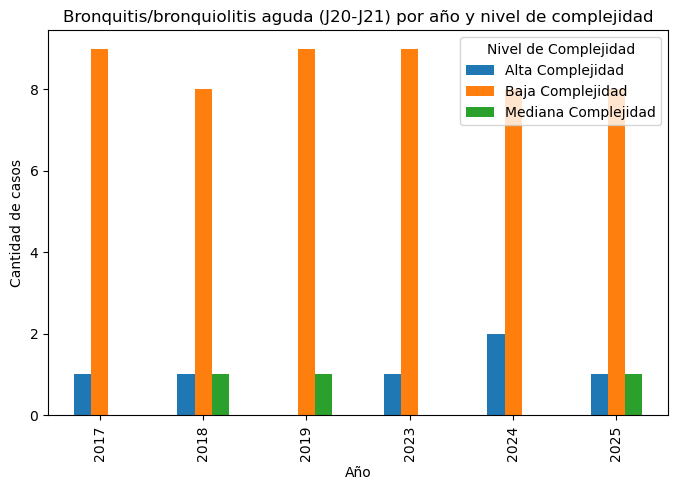

In [47]:
grafico4 = df_4.groupby(["Anio", "NivelComplejidad"]).size().unstack()
grafico4.plot(kind="bar", figsize=(8,5))
plt.title("Bronquitis/bronquiolitis aguda (J20-J21) por año y nivel de complejidad")
plt.xlabel("Año")
plt.ylabel("Cantidad de casos")
plt.legend(title="Nivel de Complejidad")
plt.show()

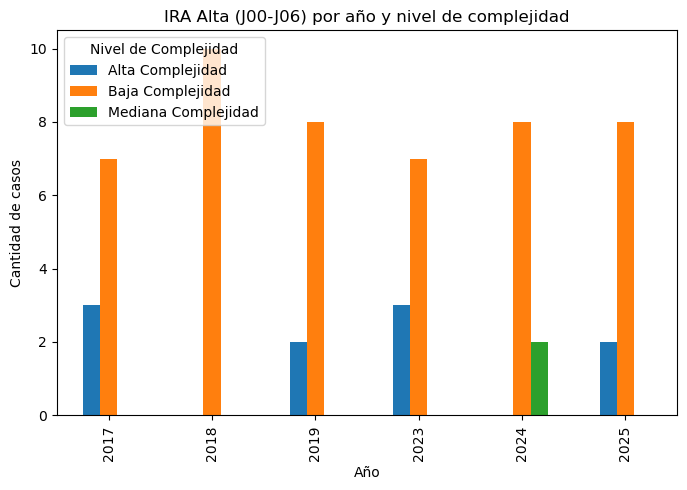

In [48]:
grafico5 = df_5.groupby(["Anio", "NivelComplejidad"]).size().unstack()
grafico5.plot(kind="bar", figsize=(8,5))
plt.title("IRA Alta (J00-J06) por año y nivel de complejidad")
plt.xlabel("Año")
plt.ylabel("Cantidad de casos")
plt.legend(title="Nivel de Complejidad")
plt.show()

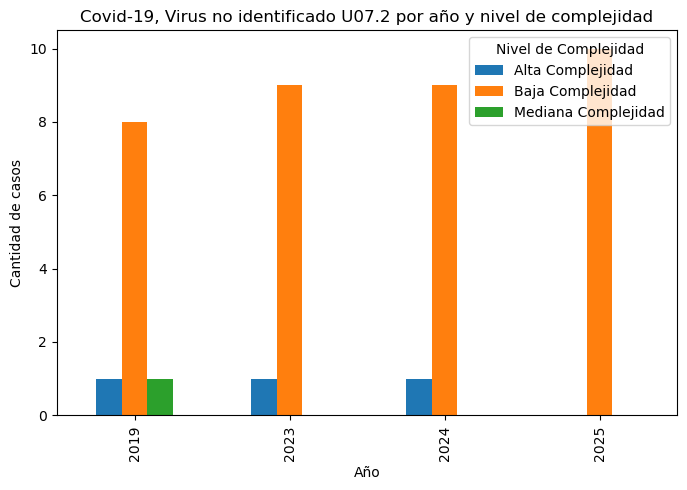

In [49]:
grafico = df_6.groupby(["Anio", "NivelComplejidad"]).size().unstack()
grafico.plot(kind="bar", figsize=(8,5))
plt.title("Covid-19, Virus no identificado U07.2 por año y nivel de complejidad")
plt.xlabel("Año")
plt.ylabel("Cantidad de casos")
plt.legend(title="Nivel de Complejidad")
plt.show()

Aqui se ve de mejor manera a traves de los graficos que el nivel de complejidad no esta ligado directamente a la patologia

#### conclusiones
* Notamos que no existe una relación fija entre tipo de patología y nivel de urgencia. Las mismas patologías (por ejemplo, IRA Alta o Covid-19, virus no identificado) aparecen registradas tanto en **baja**, **mediana** como alta **complejidad**, dependiendo del año. Esto puede sugerir que **la gravedad de la atención no depende directamente del diagnóstico**, sino de otros factores externos.

* El año influye en la clasificación, pero no es el único factor. En años con mayor carga sanitaria (2020–2021, durante el COVID-19), se observa un **aumento de atenciones en niveles altos de complejidad**, probablemente se pueda deber a la saturación del sistema y el tipo de pacientes que llegaban a urgencias.

* En otros años la misma patología (como IRA Alta) se asocia mayoritariamente a baja complejidad.

* Aparecen **nuevas categorías asociadas al COVID-19 (U07.1 y U07.2)**, que adquieren un peso relevante en el total de atenciones post-pandemia.

 Para esta pregunta, concluimos entonces que el tipo de patología respiratoria no determina de forma directa el nivel de urgencia con que se atiende a un paciente.Existen factores contextuales, demográficos y sanitarios que inciden en la gravedad de las atenciones.
Por tanto, la planificación hospitalaria no debería basarse solo en el tipo de enfermedad, sino también en el perfil de la población atendida y el contexto de la población.

### **2. Incidencia geográfica de enfermedades respiratorias**

**Objetivo:** Identificar si existen regiones o comunas con una mayor incidencia de enfermedades respiratorias.


Chile cuenta con 16 regiones y más de 340 comunas, por lo que un análisis comunal sería demasiado extenso. Para simplificar el estudio, se decidió realizar el **análisis a nivel regional.**

Primero, se verificó la cantidad de registros disponibles por región, observando una mayor concentración de datos en la Región Metropolitana, seguida por Maule y Biobío, lo que refleja la distribución poblacional del país.

Luego, se creó un subconjunto del DataFrame con las columnas necesarias para el análisis geográfico: región, tipo de urgencia, fecha, causa y número total de consultas.

In [50]:
# vemos cuantos datos tenemos por región
df_anios[["RegionCodigo"]].value_counts()

RegionCodigo
13              340485
8               144467
5               121632
7               113052
6                98215
10               94947
9                74528
4                65907
14               55166
16               49822
2                43720
3                35790
1                31320
12               18900
11               13241
15                8608
Name: count, dtype: int64

In [51]:
# creamos un df solo con las columnas necesarias para responder esta pregunta 
columnas = ["RegionGlosa", "NivelAtencion", "TipoUrgencia", "Latitud", "Longitud", "Anio", "Fecha", "Causa", "NumTotal"]
df_geo = df_anios[columnas]
df_geo.head()

,RegionGlosa,NivelAtencion,TipoUrgencia,Latitud,Longitud,Anio,Fecha,Causa,NumTotal
3,Región Metropolitana de Santiago,Primario,Urgencia ambulatoria (SAR),"-33,373295","-70,636987",2025,2025-09-08,IRA Alta (J00-J06),180
6,Región Del Bíobío,Terciario,Urgencia Hospitalaria (UEH),"-36,82511","-73,037951",2017,2017-05-01,"Otra causa respiratoria (J22, J30-J39, J47, J6...",19
10,Región De Ñuble,Primario,Urgencia Hospitalaria (UEH),"-37,121823","-72,023846",2025,2025-03-17,Neumonía (J12-J18),7
13,Región De Los Ríos,Primario,Urgencia Hospitalaria (UEH),"-39,890215","-73,425706",2018,2018-08-20,IRA Alta (J00-J06),30
15,Región Del Maule,Primario,Urgencia Ambulatoria (SUR),"-35,818345","-70,820292",2025,2025-01-13,Bronquitis/bronquiolitis aguda (J20-J21),0


In [52]:
df_geo["Causa"].value_counts()

Causa
IRA Alta (J00-J06)                                         158877
Otra causa respiratoria (J22, J30-J39, J47, J60-J98)       158877
Neumonía (J12-J18)                                         158877
Bronquitis/bronquiolitis aguda (J20-J21)                   158877
Crisis obstructiva bronquial (J40-J46)                     158877
Influenza (J09-J11)                                        158877
Covid-19, Virus no identificado U07.2                       89277
HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO U07.1        89277
Covid-19, Virus identificado U07.1                          89277
HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFICADO U07.2     88707
Name: count, dtype: int64

Ahora vemos para cada región cuál es la causa respiratoria con más consultas acumuladas.

In [53]:
 # Contar totales por causa y región (acumulado todos los años)
causa_region = df_geo.groupby(["RegionGlosa", "Causa"], as_index=False)["NumTotal"].sum()
# Para cada region, encontrar la causa con mayor total
idx = causa_region.groupby("RegionGlosa")["NumTotal"].idxmax()
dominantes = causa_region.loc[idx].sort_values("NumTotal", ascending=False).reset_index(drop=True)
dominantes.columns = ["RegionGlosa", "CausaDominante", "TotalPorCausaEnRegion"]

In [54]:
dominantes.head()

,RegionGlosa,CausaDominante,TotalPorCausaEnRegion
0,Región Metropolitana de Santiago,IRA Alta (J00-J06),6899813
1,Región Del Bíobío,IRA Alta (J00-J06),2385223
2,Región Del Maule,IRA Alta (J00-J06),1791817
3,Región De Valparaíso,IRA Alta (J00-J06),1702264
4,Región De Los Lagos,IRA Alta (J00-J06),1184689


Nos damos cuenta que al hacer esto obtenemos "TOTAL CAUSAS SISTEMA RESPIRATORIO" para todas las regiones.Esa “causa” en realidad no es una enfermedad, sino una fila resumen.
Corresponde al total de consultas respiratorias sumadas para ese registro semanal (la suma de todas las causas específicas como IRA, influenza, etc.).
Filtramos para poder analizar correctamente. 

In [55]:
df_geo_filtrado = df_geo[
    (df_geo["Causa"] != "TOTAL CAUSAS SISTEMA RESPIRATORIO") &
    (df_geo["Causa"] != "HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO")
]
 # Contar totales por causa y región (acumulado todos los años)
causa_region = df_geo_filtrado.groupby(["RegionGlosa", "Causa"], as_index=False)["NumTotal"].sum()
# Para cada region, encontrar la causa con mayor total
idx = causa_region.groupby("RegionGlosa")["NumTotal"].idxmax()
dominantes = causa_region.loc[idx].sort_values("NumTotal", ascending=False).reset_index(drop=True)
dominantes.columns = ["RegionGlosa", "CausaDominante", "TotalPorCausaEnRegion"]

In [56]:
dominantes.head(16)

,RegionGlosa,CausaDominante,TotalPorCausaEnRegion
0,Región Metropolitana de Santiago,IRA Alta (J00-J06),6899813
1,Región Del Bíobío,IRA Alta (J00-J06),2385223
2,Región Del Maule,IRA Alta (J00-J06),1791817
3,Región De Valparaíso,IRA Alta (J00-J06),1702264
4,Región De Los Lagos,IRA Alta (J00-J06),1184689
5,Región De La Araucanía,IRA Alta (J00-J06),839312
6,Región Del Libertador Gral. B. O'Higgins,IRA Alta (J00-J06),831603
7,Región De Coquimbo,IRA Alta (J00-J06),742524
8,Región De Antofagasta,IRA Alta (J00-J06),635329
9,Región De Los Ríos,IRA Alta (J00-J06),527489


#### Tras filtrar estos registros, se determinó que la **IRA Alta (J00–J06)** es la causa respiratoria más frecuente en todas las regiones del país.

Al comparar los totales acumulados por región, la Región Metropolitana de Santiago presenta el mayor número absoluto de hospitalizaciones respiratorias, seguida por Biobío, Maule y Valparaíso. No obstante, esta diferencia puede estar influenciada por el tamaño poblacional.

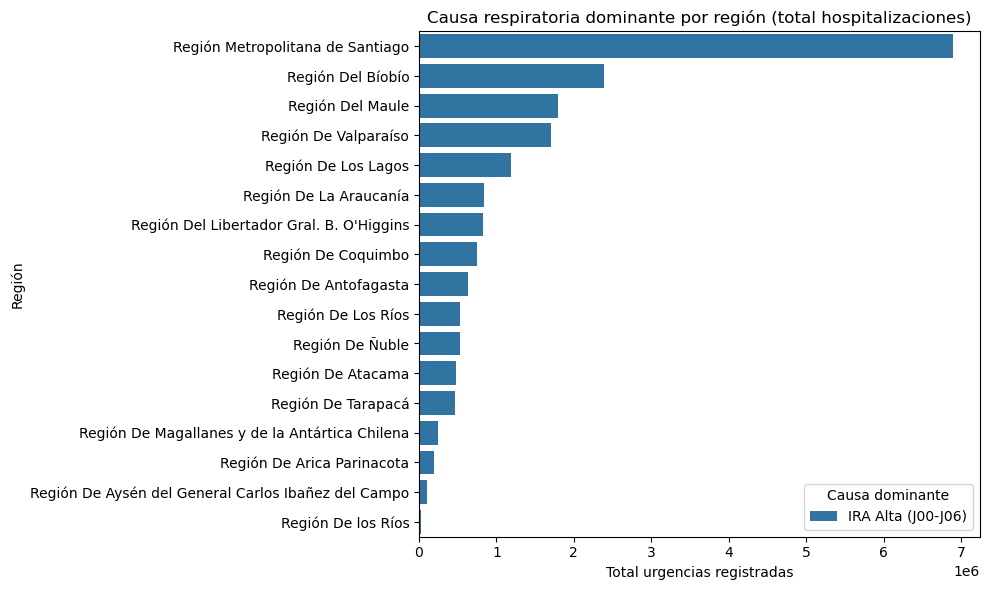

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=dominantes,
    y="RegionGlosa",
    x="TotalPorCausaEnRegion",
    hue="CausaDominante",
    dodge=False
)

plt.title("Causa respiratoria dominante por región (total hospitalizaciones)")
plt.xlabel("Total urgencias registradas")
plt.ylabel("Región")
plt.legend(title="Causa dominante")
plt.tight_layout()
plt.show()

Buscamos ahora la segunda causa respiratoria más frecuente para ver si también coincide en todas las regiones.

In [58]:
causa_region_sorted = causa_region.sort_values(["RegionGlosa", "NumTotal"], ascending=[True, False])

top2_por_region = causa_region_sorted.groupby("RegionGlosa").head(2).reset_index(drop=True)
top2_por_region

,RegionGlosa,Causa,NumTotal
0,Región De Antofagasta,IRA Alta (J00-J06),635329
1,Región De Antofagasta,Bronquitis/bronquiolitis aguda (J20-J21),103253
2,Región De Arica Parinacota,IRA Alta (J00-J06),198310
3,Región De Arica Parinacota,Bronquitis/bronquiolitis aguda (J20-J21),59002
4,Región De Atacama,IRA Alta (J00-J06),478632
5,Región De Atacama,Bronquitis/bronquiolitis aguda (J20-J21),97584
6,Región De Aysén del General Carlos Ibañez del ...,IRA Alta (J00-J06),108824
7,Región De Aysén del General Carlos Ibañez del ...,Bronquitis/bronquiolitis aguda (J20-J21),32197
8,Región De Coquimbo,IRA Alta (J00-J06),742524
9,Región De Coquimbo,Bronquitis/bronquiolitis aguda (J20-J21),148951


Ahora graficamos esto para visualizar

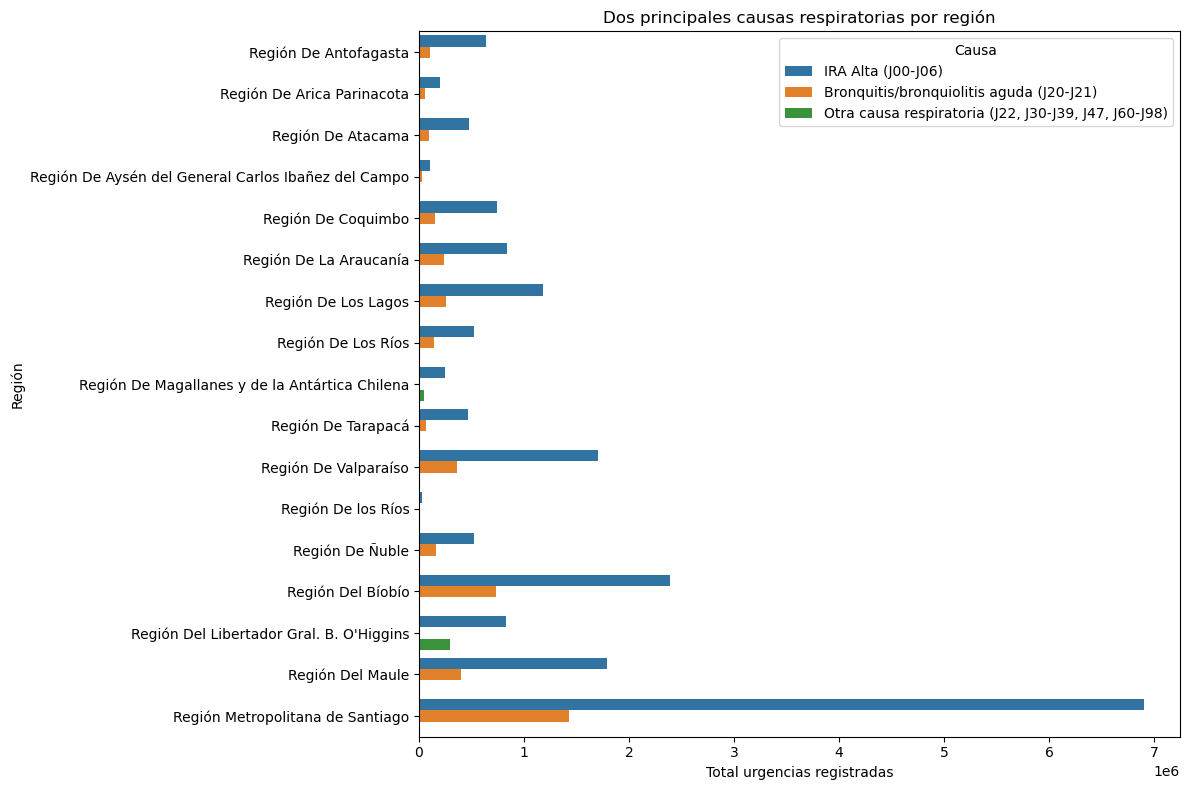

In [59]:
# graficamos 
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top2_por_region,
    y="RegionGlosa",
    x="NumTotal",
    hue="Causa"
)

plt.title("Dos principales causas respiratorias por región")
plt.xlabel("Total urgencias registradas")
plt.ylabel("Región")
plt.legend(title="Causa")
plt.tight_layout()
plt.show()

Si bien, hasta ahora, pareciera ser que la región metropolitana contiene la mayor cantidad de contagios por enfermedades respiratorias registrados en urgencia, esto no está considerando el hecho de que hay regiones con más habitantes que otras, ya que comparar el número total de hospitalizaciones entre regiones no es equitativo, porque la Región Metropolitana, por ejemplo, tiene mucha más población que Aysén.

Para saber cuál región tiene proporcionalmente más contagios, tenemos que calcular la tasa por habitante, es decir:

##### Tasa por 100.000 habitantes = (Hospitalizaciones Totales/población) x 100000

Sacamos los datos de la cantidad de habitantes por región de acuerdo a los datos del censo 2024 **https://censo2024.ine.gob.cl/resultados-dashboard/**.

Se crea una tabla manual con la población por cada región.

In [60]:
# población aproximada del censo 2024
poblacion_region = {
    "Región Metropolitana de Santiago": 7400741,
    "Región De Valparaíso": 1896053,
    "Región Del Bíobío": 1613059,
    "Región De La Araucanía": 1010423,
    "Región Del Maule": 1123008,
    "Región De Coquimbo": 832864,
    "Región De Los Lagos": 890284,
    "Región Del Libertador Gral. B. O'Higgins": 987228,
    "Región De Antofagasta": 635416,
    "Región De los Ríos": 398230,
    "Región De Ñuble": 512289,
    "Región De Atacama": 299180,
    "Región De Tarapacá": 369806,
    "Región De Magallanes y de la Antártica Chilena": 166537,
    "Región De Arica Parinacota": 244569,
    "Región De Aysén del General Carlos Ibañez del Campo": 100745
}


In [61]:
dominantes["Poblacion"] = dominantes["RegionGlosa"].map(poblacion_region)
dominantes["Tasa_por_100mil"] = (dominantes["TotalPorCausaEnRegion"] / dominantes["Poblacion"]) * 100000

In [62]:
dominantes.head()

,RegionGlosa,CausaDominante,TotalPorCausaEnRegion,Poblacion,Tasa_por_100mil
0,Región Metropolitana de Santiago,IRA Alta (J00-J06),6899813,7400741.0,93231.380479
1,Región Del Bíobío,IRA Alta (J00-J06),2385223,1613059.0,147869.544759
2,Región Del Maule,IRA Alta (J00-J06),1791817,1123008.0,159555.141192
3,Región De Valparaíso,IRA Alta (J00-J06),1702264,1896053.0,89779.346885
4,Región De Los Lagos,IRA Alta (J00-J06),1184689,890284.0,133068.661236


In [63]:
# vemos si nos quedan datos nulos 
dominantes.isnull()

,RegionGlosa,CausaDominante,TotalPorCausaEnRegion,Poblacion,Tasa_por_100mil
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,True,True


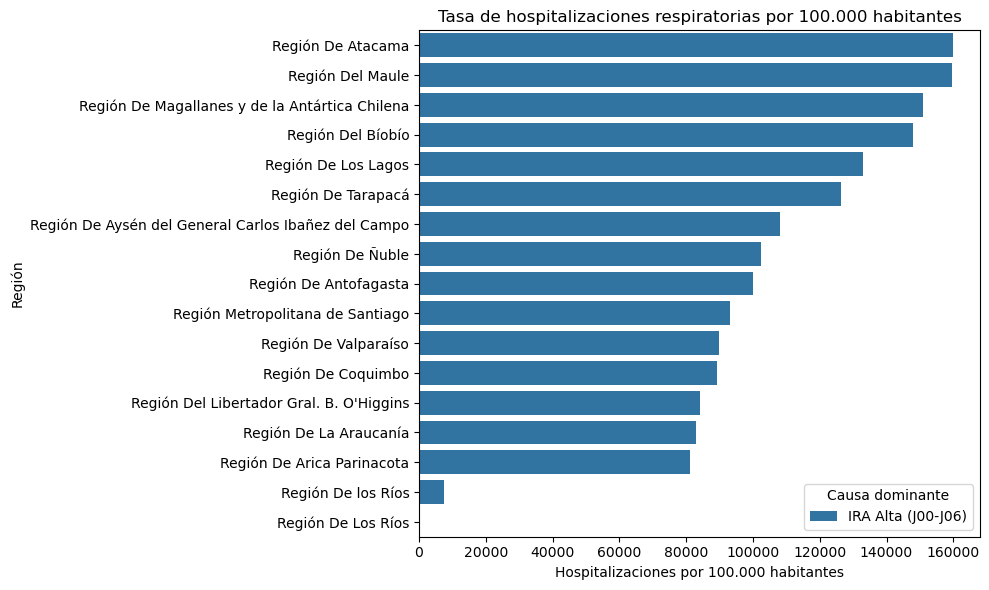

In [64]:
# graficamos los resultados 
plt.figure(figsize=(10, 6))
sns.barplot(
    data=dominantes.sort_values("Tasa_por_100mil", ascending=False),
    y="RegionGlosa",
    x="Tasa_por_100mil",
    hue="CausaDominante",
    dodge=False
)

plt.title("Tasa de hospitalizaciones respiratorias por 100.000 habitantes")
plt.xlabel("Hospitalizaciones por 100.000 habitantes")
plt.ylabel("Región")
plt.legend(title="Causa dominante")
plt.tight_layout()
plt.show()


## Si cambia! 
Al observar el gráfico se muestra que, si bien la Región Metropolitana lidera en cantidad absoluta de casos (como pudimos ver en los primeros 2 gráficos), las regiones de Atacama, el Maule, Biobío y Aysén presentan tasas proporcionalmente más altas, es decir, tienen una mayor incidencia relativa de enfermedades respiratorias.

Esto sugiere que las enfermedades respiratorias afectan con más intensidad a ciertas regiones menos pobladas, posiblemente debido a factores ambientales (como clima frío o contaminación), acceso a la atención médica, densidad habitacional o recursos ecónomicos de la región.

In [97]:
causa_region_sorted["Poblacion"] = causa_region_sorted["RegionGlosa"].map(poblacion_region)

# Calcular tasa
causa_region_sorted["Tasa_por_100mil"] = (
    causa_region_sorted["NumTotal"] / causa_region_sorted["Poblacion"] * 100000
)
causa_region_sorted_tasa = causa_region_sorted.sort_values(["RegionGlosa", "Tasa_por_100mil"], ascending=[True, False])

# Tomamos las dos principales causas por región
top2_por_region_tasa = causa_region_sorted_tasa.groupby("RegionGlosa").head(2).reset_index(drop=True)

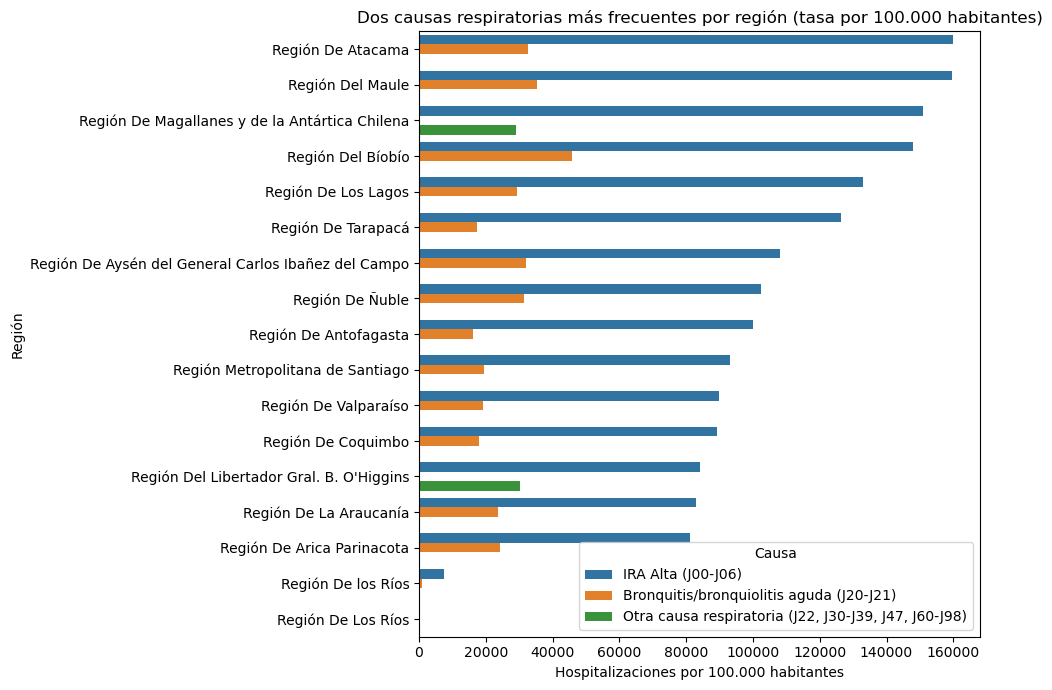

In [98]:
top2_por_region_tasa_sorted = top2_por_region_tasa.sort_values("Tasa_por_100mil", ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(
    data=top2_por_region_tasa_sorted,
    y="RegionGlosa",
    x="Tasa_por_100mil",
    hue="Causa",
    dodge=True
)

plt.title("Dos causas respiratorias más frecuentes por región (tasa por 100.000 habitantes)")
plt.xlabel("Hospitalizaciones por 100.000 habitantes")
plt.ylabel("Región")
plt.legend(title="Causa")
plt.tight_layout()
plt.show()

#### Conclusiones

* La **IRA Alta (J00–J06)** es la causa más frecuente en todas las regiones.

* Las regiones Maule, Biobío y Aysén muestran las tasas más altas por habitante, superando incluso a la Región Metropolitana.

* Al analizar las dos principales causas por región, se repite el patrón de predominio de IRA Alta y Bronquitis/Bronquiolitis aguda (J20–J21).

* Esto evidencia que, aunque los casos absolutos se concentran en las zonas más pobladas, la incidencia proporcional es mayor en regiones dentro del país, que en la capital y Regiones cercanas a la capital.

###  **3. Evolución temporal de las patologías respiratorias**

**Objetivo:** Analizar cómo han cambiado las patologías respiratorias a lo largo del tiempo, especialmente antes y después del COVID-19.

Para este análisis se consideraron los años 2017–2019 (periodo pre-COVID) y 2023–2025 (periodo post-COVID). Los años intermedios (2020–2022) fueron excluidos debido a la fuerte alteración que produjo la pandemia en la atención de urgencias y la disponibilidad de registros.

#### Separación en periodos pre y post COVID para análisis.

In [99]:
# Periodo pre COVID: 2017-2019
df_pre = df_anios[df_anios['Anio'].isin([2017, 2018, 2019])]

# Periodo post COVID: 2023-2025
df_post = df_anios[df_anios['Anio'].isin([2023, 2024, 2025])]

Ahora para analizar cómo han cambiado las patologías respiratorias en el tiempo, comparamos el número total de consultas por año y por causa (patología).

In [100]:
# Total de consultas por año y tipo de patología
consultas_por_causa = (
    df_pre
    .groupby(['Anio', 'Causa'], as_index=False)['NumTotal']
    .sum()
)

# Vista rápida del resultado
consultas_por_causa.head()

,Anio,Causa,NumTotal
0,2017,Bronquitis/bronquiolitis aguda (J20-J21),743282
1,2017,Crisis obstructiva bronquial (J40-J46),243642
2,2017,IRA Alta (J00-J06),3222458
3,2017,Influenza (J09-J11),82258
4,2017,Neumonía (J12-J18),173518


In [101]:
# Total de consultas por año y tipo de patología
consultas_por_causa = (
    df_post
    .groupby(['Anio', 'Causa'], as_index=False)['NumTotal']
    .sum()
)

# Vista rápida del resultado
consultas_por_causa.head()

,Anio,Causa,NumTotal
0,2023,Bronquitis/bronquiolitis aguda (J20-J21),824573
1,2023,"Covid-19, Virus identificado U07.1",123833
2,2023,"Covid-19, Virus no identificado U07.2",182755
3,2023,Crisis obstructiva bronquial (J40-J46),215250
4,2023,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",1833


In [102]:
# Agrupamos y sumamos por causa (todas las patologías)
pre_causas = (
    df_pre
    .groupby('Causa', as_index=False)['NumTotal']
    .sum()
    .sort_values(by='NumTotal', ascending=False)
)

pre_causas

,Causa,NumTotal
5,IRA Alta (J00-J06),9609270
0,Bronquitis/bronquiolitis aguda (J20-J21),2211485
8,"Otra causa respiratoria (J22, J30-J39, J47, J6...",1365688
3,Crisis obstructiva bronquial (J40-J46),690454
7,Neumonía (J12-J18),521859
6,Influenza (J09-J11),243183
4,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",0
1,"Covid-19, Virus identificado U07.1",0
2,"Covid-19, Virus no identificado U07.2",0


In [103]:
post_causas = (
    df_post
    .groupby('Causa', as_index=False)['NumTotal']
    .sum()
    .sort_values(by='NumTotal', ascending=False)
)

post_causas


,Causa,NumTotal
6,IRA Alta (J00-J06),9989845
0,Bronquitis/bronquiolitis aguda (J20-J21),2265062
9,"Otra causa respiratoria (J22, J30-J39, J47, J6...",985807
8,Neumonía (J12-J18),686270
3,Crisis obstructiva bronquial (J40-J46),562128
7,Influenza (J09-J11),288778
2,"Covid-19, Virus no identificado U07.2",205249
1,"Covid-19, Virus identificado U07.1",155636
5,"HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFIC...",4549
4,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",2710


#### Comparación visual de patologías pre y post COVID

se muestran los datos mediante un gráfico de dispersión:
cada punto representa una patología, su posición en el eje**X** es el total **pre-COVID** y el eje **Y** el total **post-COVID**
Así es posible observar cuáles aumentaron (por encima de la diagonal) y cuáles disminuyeron (por debajo).

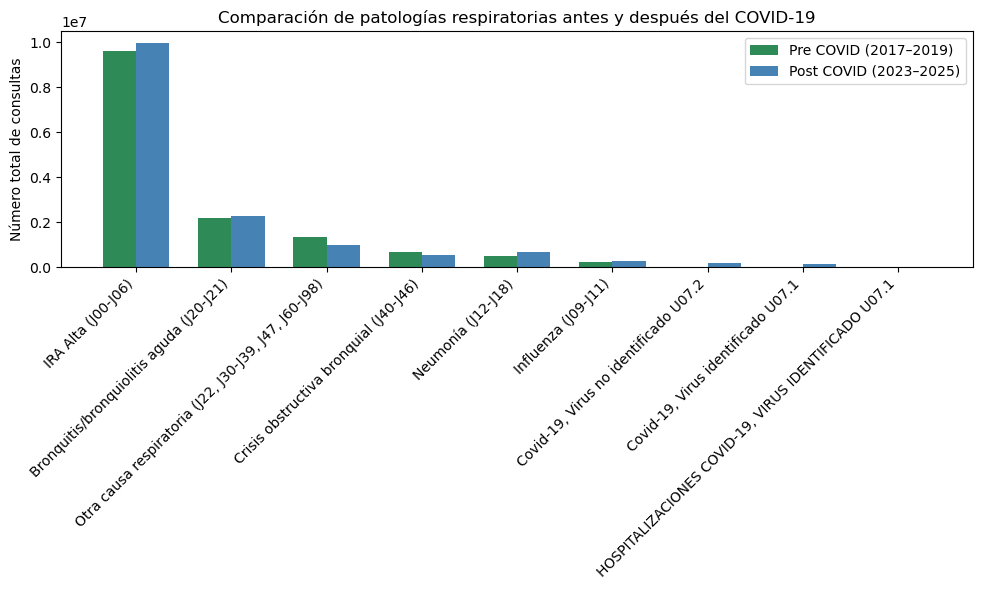

In [104]:
# Unimos ambos dataframes por causa 
comparacion = pre_causas.merge(post_causas, on='Causa', suffixes=('_pre', '_post'))

# --- Ordenamos 
comparacion['Total'] = comparacion['NumTotal_pre'] + comparacion['NumTotal_post']
comparacion = comparacion.sort_values('Total', ascending=False)


x = np.arange(len(comparacion))  # posiciones para las causas
ancho = 0.35                     # ancho de cada barra

plt.figure(figsize=(10, 6))

# Barras Pre y Post
plt.bar(x - ancho/2, comparacion['NumTotal_pre'], width=ancho, color='seagreen', label='Pre COVID (2017–2019)')
plt.bar(x + ancho/2, comparacion['NumTotal_post'], width=ancho, color='steelblue', label='Post COVID (2023–2025)')

# Etiquetas y formato
plt.xticks(x, comparacion['Causa'], rotation=45, ha='right')
plt.ylabel('Número total de consultas')
plt.title('Comparación de patologías respiratorias antes y después del COVID-19')
plt.legend()
plt.tight_layout()
plt.show()

#### conclusiones
* Las patologías **IRA Alta (J00–J06)** y **Bronquitis/Bronquiolitis aguda (J20–J21)** se mantienen como las más frecuentes tanto antes como después del COVID-19.

* Algunas patologías, como **Neumonía (J12–J18)**, muestran un **aumento leve en el periodo post-COVID**, lo que podría reflejar secuelas o mayor susceptibilidad respiratoria.En cambio, las crisis obstructivas bronquiales y las “otras causas respiratorias” disminuyen ligeramente, situándose bajo la diagonal.

* Aparecen **nuevas categorías asociadas al COVID-19 (U07.1 y U07.2)**, que adquieren un peso relevante en el total de atenciones post-pandemia.

En conjunto, el gráfico evidencia que, aunque la distribución general de patologías respiratorias se mantiene, la pandemia introdujo un cambio importante en la magnitud y composición de las atenciones respiratorias.

### **4. Relación entre grupos etarios y prevalencia**

**Objetivo:** Explorar qué patologías afectan con mayor frecuencia a cada grupo etario.


**procedimiento:** Para comenzar a responder esta pregunta veremos las edades mas comunes en casos de enfermedades respiratorias:

In [105]:
df_anios.columns

Index(['EstablecimientoCodigo', 'EstablecimientoGlosa', 'RegionCodigo',
       'RegionGlosa', 'ComunaCodigo', 'ComunaGlosa', 'ServicioSaludCodigo',
       'ServicioSaludGlosa', 'TipoEstablecimiento',
       'DependenciaAdministrativa', 'NivelAtencion', 'TipoUrgencia', 'Latitud',
       'Longitud', 'NivelComplejidad', 'Anio', 'SemanaEstadistica',
       'OrdenCausa', 'Causa', 'NumTotal', 'NumMenor1Anio', 'Num1a4Anios',
       'Num5a14Anios', 'Num15a64Anios', 'Num65oMas', 'Fecha'],
      dtype='object')

In [106]:
df_anios[['NumMenor1Anio', 'Num1a4Anios',
       'Num5a14Anios', 'Num15a64Anios', 'Num65oMas']].sum().sort_values(ascending=False)

Num15a64Anios    13584412
Num5a14Anios      6576971
Num1a4Anios       5167356
Num65oMas         2762148
NumMenor1Anio     1697086
dtype: int64

↖ Notamos que el rango de edades más común para enfermedades respiratorias entre 2017 al 2019 *(Pre Covid-19)* y entre 2023 al 2025 *(Post Covid-19)* es entre 15 a 64 años. Ahora me gustaria ver por separado entre pre y post Covid-19:

In [107]:
#Vemos primero por pre covid-19
pre_covid = df_anios[["Anio", 'NumMenor1Anio', 'Num1a4Anios',
       'Num5a14Anios', 'Num15a64Anios', 'Num65oMas']]

#Filtramos para tomar solo los años pre covid-19 [2017, 2018, 2019]
data_pre = pre_covid[pre_covid["Anio"] <= 2019]

#Ahora quitamos la columna Anio para evitar confundirnos con la suma de esa columna
pre_covid = data_pre[['NumMenor1Anio', 'Num1a4Anios',
       'Num5a14Anios', 'Num15a64Anios', 'Num65oMas']]

#Ahora calculamos la suma de cada columna
cant_pre = pre_covid.sum().sort_values(ascending=False)
cant_pre

Num15a64Anios    6297031
Num1a4Anios      3043712
Num5a14Anios     2990968
Num65oMas        1261421
NumMenor1Anio    1048807
dtype: int64

↖ Notamos que el rango de edades más común **pre covid-19** es entre 15 a 64 años, sin embargo, el segundo más común está entre 1 a 4 años.

In [108]:
#Vemos primero por post covid-19
post_covid = df_anios[["Anio", 'NumMenor1Anio', 'Num1a4Anios',
       'Num5a14Anios', 'Num15a64Anios', 'Num65oMas']]

#Filtramos para tomar solo los años post covid-19 [2023, 2024, 2025]
data_post = post_covid[post_covid["Anio"] >= 2023]

#Ahora quitamos la columna Anio para evitar confundirnos con la suma de esa columna
post_covid = data_post[['NumMenor1Anio', 'Num1a4Anios',
       'Num5a14Anios', 'Num15a64Anios', 'Num65oMas']]

#Ahora calculamos la suma de cada columna
cant_post = post_covid.sum().sort_values(ascending=False)
cant_post

Num15a64Anios    7287381
Num5a14Anios     3586003
Num1a4Anios      2123644
Num65oMas        1500727
NumMenor1Anio     648279
dtype: int64

↖ Notamos que el rango de edades más común **post covid-19** es entre 15 a 64 años, sin embargo, el segundo más común está entre 5 a 14 años.

In [109]:
dif_pre = cant_pre - cant_post
dif_post = cant_post - cant_pre
dif_general = abs(cant_pre - cant_post)
dif_pre.sort_values(ascending=False)

Num1a4Anios      920068
NumMenor1Anio    400528
Num65oMas       -239306
Num5a14Anios    -595035
Num15a64Anios   -990350
dtype: int64

↖ Si analizamos **pre covid-19** se registran más casos en los rangos etarios: menores a 1 año y 1-4 años.

In [110]:
dif_post.sort_values(ascending=False)

Num15a64Anios    990350
Num5a14Anios     595035
Num65oMas        239306
NumMenor1Anio   -400528
Num1a4Anios     -920068
dtype: int64

↖Si analizamos **post covid-19** se registran más casos en los rangos etarios: 5-14 años, 15-64 años y mayores o iguales a 65 años.

In [112]:
#Ahora analizaremos la segunda parte de la pregunta

¿Qué patologías son más comunes en cada grupo de edad?

Analizamos primero el momento pre covid-19:

In [113]:
pre_covid = df_anios[["NivelAtencion", "TipoUrgencia", "Anio", "OrdenCausa", "Causa", 'NumMenor1Anio', 'Num1a4Anios',
       'Num5a14Anios', 'Num15a64Anios', 'Num65oMas']]

#Volvemos a filtrar ahora utilizando más filas
pre_covid = pre_covid[pre_covid["Anio"] <= 2019]
pre_covid

,NivelAtencion,TipoUrgencia,Anio,OrdenCausa,Causa,NumMenor1Anio,Num1a4Anios,Num5a14Anios,Num15a64Anios,Num65oMas
6,Terciario,Urgencia Hospitalaria (UEH),2017,9,"Otra causa respiratoria (J22, J30-J39, J47, J6...",2,0,1,11,5
13,Primario,Urgencia Hospitalaria (UEH),2018,4,IRA Alta (J00-J06),4,2,7,15,2
28,Primario,Urgencia Ambulatoria (SAPU),2019,8,Crisis obstructiva bronquial (J40-J46),0,1,0,0,0
31,Terciario,Urgencia Hospitalaria (UEH),2017,9,"Otra causa respiratoria (J22, J30-J39, J47, J6...",1,1,2,2,2
38,Primario,Urgencia ambulatoria (SAR),2017,9,"Otra causa respiratoria (J22, J30-J39, J47, J6...",0,0,0,7,1
...,...,...,...,...,...,...,...,...,...,...
3267833,Terciario,Urgencia Hospitalaria (UEH),2019,8,Crisis obstructiva bronquial (J40-J46),0,0,3,7,5
3267837,Primario,Urgencia Hospitalaria (UEH),2019,9,"Otra causa respiratoria (J22, J30-J39, J47, J6...",0,0,0,0,0
3267839,Primario,Urgencia ambulatoria (SAR),2018,6,Neumonía (J12-J18),0,5,2,1,7
3267850,Primario,Urgencia Ambulatoria (SAPU),2019,7,Bronquitis/bronquiolitis aguda (J20-J21),0,2,1,7,3


In [114]:
analisis_pre = pre_covid.groupby("Causa")[["NumMenor1Anio", "Num1a4Anios", "Num5a14Anios", "Num15a64Anios", "Num65oMas"]].sum()
analisis_pre

,NumMenor1Anio,Num1a4Anios,Num5a14Anios,Num15a64Anios,Num65oMas
Causa,,,,,
Bronquitis/bronquiolitis aguda (J20-J21),260358,539172,350429,775885,285641
"Covid-19, Virus identificado U07.1",0,0,0,0,0
"Covid-19, Virus no identificado U07.2",0,0,0,0,0
Crisis obstructiva bronquial (J40-J46),60168,132814,89755,239159,168558
"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO U07.1",0,0,0,0,0
IRA Alta (J00-J06),604934,2036961,2201394,4358845,407136
Influenza (J09-J11),3949,17392,54006,154117,13719
Neumonía (J12-J18),33740,84489,35879,140746,227005
"Otra causa respiratoria (J22, J30-J39, J47, J60-J98)",85658,232884,259505,628279,159362


In [115]:
mas_comunes_pre_covid = analisis_pre.idxmax()
mas_comunes_pre_covid


NumMenor1Anio    IRA Alta (J00-J06)
Num1a4Anios      IRA Alta (J00-J06)
Num5a14Anios     IRA Alta (J00-J06)
Num15a64Anios    IRA Alta (J00-J06)
Num65oMas        IRA Alta (J00-J06)
dtype: object

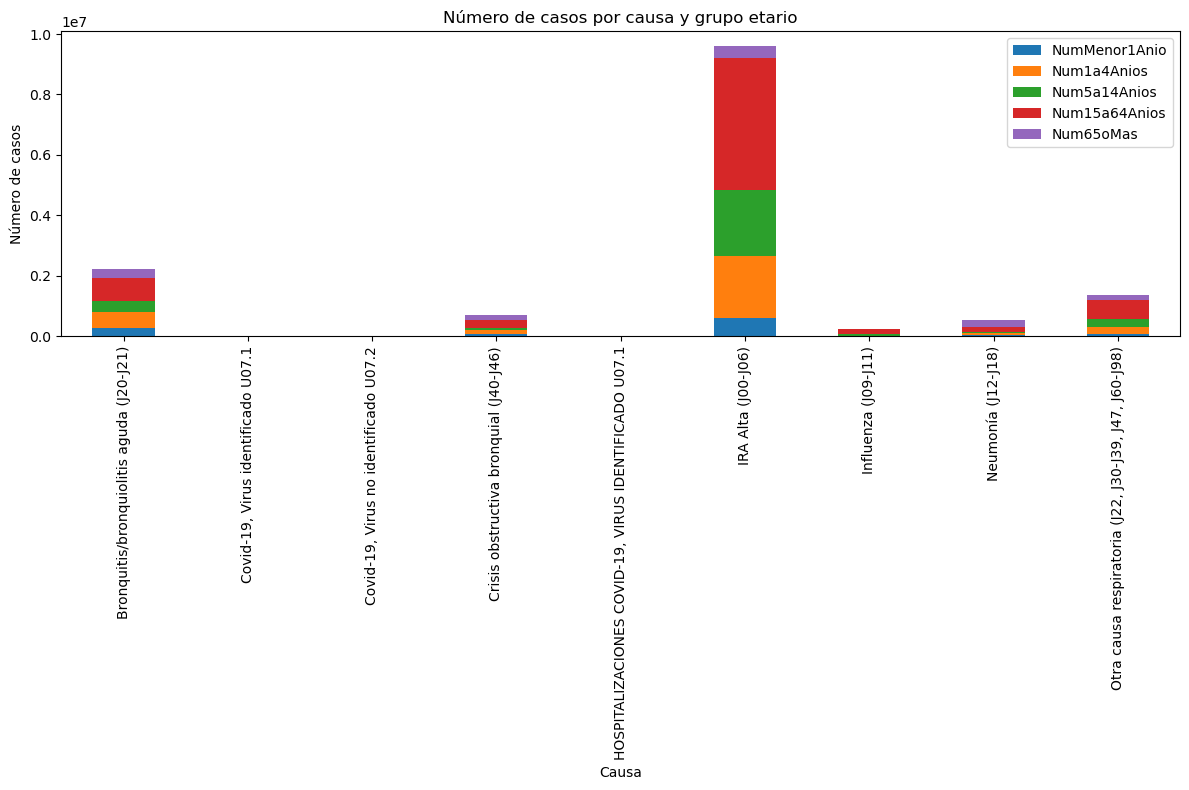

In [116]:
# Crear gráfico de barras apiladas
analisis_pre.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Número de casos por causa y grupo etario')
plt.xlabel('Causa')
plt.ylabel('Número de casos')
plt.xticks(rotation=90)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

↖ Notamos una causa común pre covid-19: **IRA Alta (J00-J06)**

In [117]:
post_covid = df_anios[["NivelAtencion", "TipoUrgencia", "Anio", "OrdenCausa", "Causa", 'NumMenor1Anio', 'Num1a4Anios',
       'Num5a14Anios', 'Num15a64Anios', 'Num65oMas']]

#Volvemos a filtrar ahora utilizando más filas
post_covid = post_covid[post_covid["Anio"] >= 2023]
post_covid

,NivelAtencion,TipoUrgencia,Anio,OrdenCausa,Causa,NumMenor1Anio,Num1a4Anios,Num5a14Anios,Num15a64Anios,Num65oMas
3,Primario,Urgencia ambulatoria (SAR),2025,4,IRA Alta (J00-J06),4,30,38,99,9
10,Primario,Urgencia Hospitalaria (UEH),2025,6,Neumonía (J12-J18),0,1,0,1,5
15,Primario,Urgencia Ambulatoria (SUR),2025,7,Bronquitis/bronquiolitis aguda (J20-J21),0,0,0,0,0
19,Primario,Urgencia Ambulatoria (SAPU),2023,8,Crisis obstructiva bronquial (J40-J46),0,0,0,0,1
20,Terciario,Urgencia Hospitalaria (UEH),2024,8,Crisis obstructiva bronquial (J40-J46),0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
3267866,Primario,Urgencia Ambulatoria (SAPU),2023,10,"Covid-19, Virus no identificado U07.2",0,0,1,0,0
3267868,Primario,Urgencia ambulatoria (SAR),2023,8,Crisis obstructiva bronquial (J40-J46),0,0,0,3,1
3267869,Primario,Urgencia Ambulatoria (SUR),2023,9,"Otra causa respiratoria (J22, J30-J39, J47, J6...",0,0,1,0,0
3267872,Terciario,Urgencia Especializada,2023,7,Bronquitis/bronquiolitis aguda (J20-J21),0,0,0,0,0


In [118]:
analisis_post = post_covid.groupby("Causa")[["NumMenor1Anio", "Num1a4Anios", "Num5a14Anios", "Num15a64Anios", "Num65oMas"]].sum()
analisis_post

,NumMenor1Anio,Num1a4Anios,Num5a14Anios,Num15a64Anios,Num65oMas
Causa,,,,,
Bronquitis/bronquiolitis aguda (J20-J21),147854,408957,491786,922255,294210
"Covid-19, Virus identificado U07.1",4820,3817,12124,112951,21924
"Covid-19, Virus no identificado U07.2",4657,12935,32689,135898,19070
Crisis obstructiva bronquial (J40-J46),18109,60708,99629,224785,158897
"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO U07.1",238,111,99,626,1636
"HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFICADO U07.2",417,331,309,1388,2104
IRA Alta (J00-J06),399822,1406924,2607497,5048249,527353
Influenza (J09-J11),3226,14974,62924,186116,21538
Neumonía (J12-J18),20405,86910,82969,212113,283873


In [119]:
mas_comunes_post_covid = analisis_post.idxmax()
mas_comunes_post_covid

NumMenor1Anio    IRA Alta (J00-J06)
Num1a4Anios      IRA Alta (J00-J06)
Num5a14Anios     IRA Alta (J00-J06)
Num15a64Anios    IRA Alta (J00-J06)
Num65oMas        IRA Alta (J00-J06)
dtype: object

↖ Notamos una causa común post covid-19: **IRA Alta (J00-J06)**

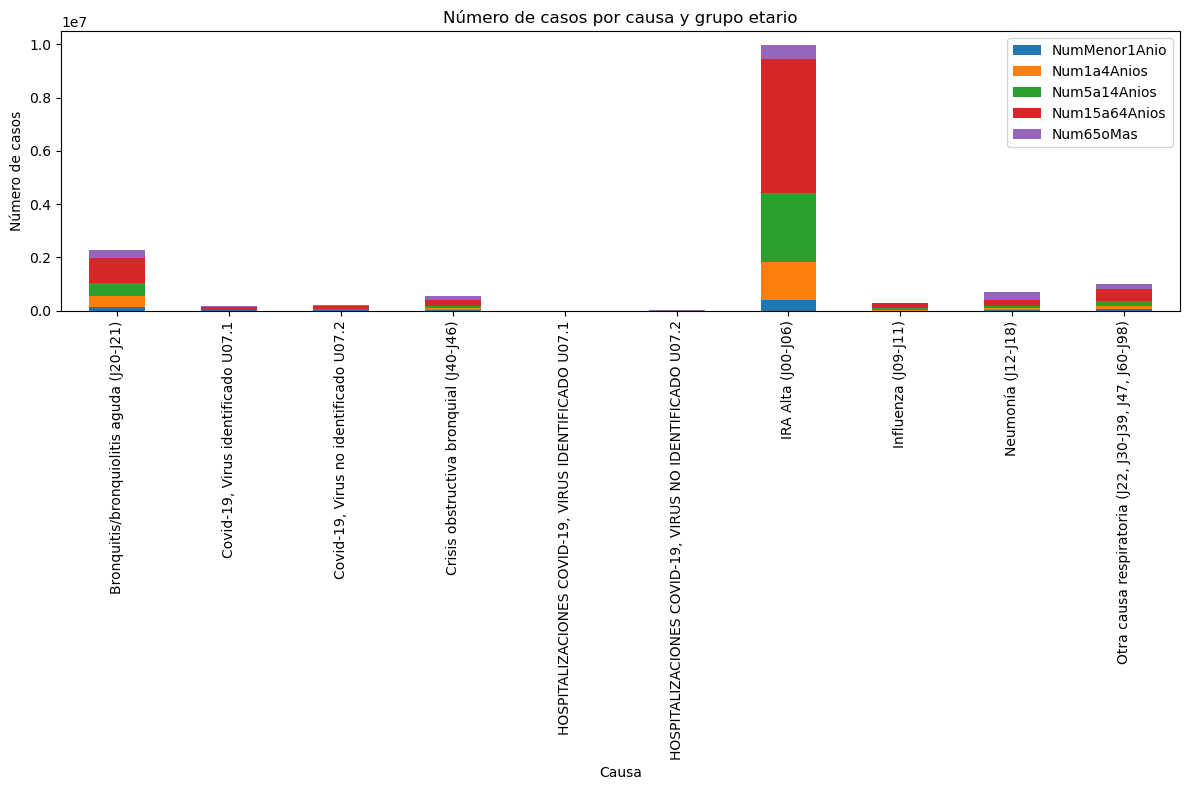

In [120]:

# Crear gráfico de barras apiladas
analisis_post.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Número de casos por causa y grupo etario')
plt.xlabel('Causa')
plt.ylabel('Número de casos')
plt.xticks(rotation=90)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#### conclusiones
* La patología IRA Alta (J00–J06) se mantiene como la más prevalente en todos los grupos etarios, tanto en el período pre-COVID (2017–2019) como en el post-COVID (2023–2025), evidenciando su persistencia como causa dominante entre las otras causas respiratorias.

* Aunque antes de la pandemia los casos se concentraban principalmente en niños menores de 4 años, en el período posterior se observa un aumento de atenciones en grupos mayores, especialmente entre 5 y 64 años, lo que indica un cambio en el perfil etario afectado.

* Este desplazamiento podría explicarse por efectos inmunológicos post-COVID, cambios en la exposición a virus respiratorios tras el fin de las medidas sanitarias, y ajustes en los patrones de atención en el sistema de salud.
* 
En general, en este objetivo podemos notar que resultados muestran que, si bien la causa predominante no varía, la pandemia modificó la distribución etaria de las enfermedades respiratorias, ampliando su impacto hacia edades mayores y resaltando la importancia de estrategias preventivas más integrales.

## **5. Integración de resultados y pregunta principal**

**Objetivo:** Analizar la evolución de las consultas por enfermedades respiratorias en urgencias en Chile antes y después del COVID-19, identificando tendencias y cambios relevantes.Es decir, responder la pregunta principal de nuestra investigación:

> **¿Se ha observado un aumento de las enfermedades respiratorias que motivan consultas en urgencias tras la pandemia, en comparación con el periodo previo al COVID-19?**

veamos las hospitalizaciones pre y post pandemia

pre pandemia

In [121]:
df_h["Anio"].astype(int)
pre_pandemia = df_h[df_h["Anio"] <= 2020]
pre_pandemia[["Causa","Anio","NivelComplejidad"]]

,Causa,Anio,NivelComplejidad
549,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",2019,Baja Complejidad
17955,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",2019,Baja Complejidad
39106,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",2019,Baja Complejidad
41194,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",2019,Alta Complejidad
45405,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",2019,Baja Complejidad
...,...,...,...
3254099,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",2019,Baja Complejidad
3257268,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",2019,Baja Complejidad
3257861,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",2019,Mediana Complejidad
3264795,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",2019,Baja Complejidad


post pandemia

In [122]:
df_h["Anio"].astype(int)
post_pandemia = df_h[df_h["Anio"] > 2020]
post_pandemia[["Causa","Anio","NivelComplejidad"]]

,Causa,Anio,NivelComplejidad
22,"HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFIC...",2023,Mediana Complejidad
23,"HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFIC...",2023,Baja Complejidad
29,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",2024,Baja Complejidad
61,"HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFIC...",2025,Baja Complejidad
72,"HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFIC...",2023,Baja Complejidad
...,...,...,...
3267752,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",2023,Baja Complejidad
3267767,"HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFIC...",2024,Baja Complejidad
3267777,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",2025,Baja Complejidad
3267828,"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...",2025,Alta Complejidad


Ahora veamos los niveles de complejidad pre y post pandemia en contagios y hospitalizaciones

In [123]:
df_anios['Anio'].astype(int)
pre_pandemia2 = df_anios[df_anios['Anio']<= 2020]
pre_pandemia2[["NivelComplejidad","Anio"]]

,NivelComplejidad,Anio
6,Alta Complejidad,2017
13,Baja Complejidad,2018
28,Baja Complejidad,2019
31,Alta Complejidad,2017
38,Baja Complejidad,2017
...,...,...
3267833,Alta Complejidad,2019
3267837,Baja Complejidad,2019
3267839,Baja Complejidad,2018
3267850,Baja Complejidad,2019


complejidad pre pandemia

In [124]:
pre_pandemia2["NivelComplejidad"].value_counts()

NivelComplejidad
Baja Complejidad       350745
Alta Complejidad        51222
Mediana Complejidad     20763
Name: count, dtype: int64

In [125]:
df_anios['Anio'].astype(int)
post_pandemia2 = df_anios[df_anios['Anio']> 2020]
post_pandemia2[["NivelComplejidad","Anio"]]

,NivelComplejidad,Anio
3,Baja Complejidad,2025
10,Baja Complejidad,2025
15,Baja Complejidad,2025
19,Baja Complejidad,2023
20,Alta Complejidad,2024
...,...,...
3267866,Baja Complejidad,2023
3267868,Baja Complejidad,2023
3267869,Baja Complejidad,2023
3267872,Alta Complejidad,2023


complejidad post pandemia

In [126]:
post_pandemia2["NivelComplejidad"].value_counts()

NivelComplejidad
Baja Complejidad       767660
Alta Complejidad        82580
Mediana Complejidad     35380
Completar                1450
Name: count, dtype: int64

Con estos datos podemos concluir que post-pandemia se ve una cantidad mas alta de hospitalizaciones y mas alta de niveles de complejidad altos con respecto al periodo pre-pandemia


### Conclusiones
* En base a todas las preguntas anteriores, junto con el análisis de hospitalizaciones pre y post pandemia, concluimos lo siguiente:

* Los resultados muestran un incremento significativo en la cantidad total de hospitalizaciones y atenciones respiratorias en el período post-pandemia (2023–2025) respecto al pre-pandemia (2017–2019).

Pre-pandemia: 350.745 atenciones de baja complejidad y 51.222 de alta.

Post-pandemia: 767.660 de baja y 82.580 de alta complejidad.
 **Esto refleja un aumento sostenido tanto en el volumen total como en los casos de mayor gravedad.**

* Aunque la IRA Alta (J00–J06) se mantiene como la patología predominante en todo el país, los análisis previos muestran que la pandemia modificó la composición y distribución de los casos, generando:

 ↖ Mayor impacto en grupos etarios mayores, especialmente entre 5 y 64 años.

 ↖ Un aumento de patologías más severas, como la Neumonía (J12–J18) y las hospitalizaciones asociadas a COVID-19 (U07.1 y U07.2).

 ↖ Cambios geográficos relevantes, destacando que las regiones del sur del país presentan las tasas más altas de incidencia proporcional por habitante.

* Sobre el nivel de urgencia, se concluye no existe una relación fija entre diagnóstico y gravedad; sin embargo, los años de mayor carga sanitaria (2020–2021) y sus efectos posteriores incrementaron los casos de alta complejidad, tendencia que se mantiene en los años siguientes.

En conjunto, los resultados evidencian que **tras la pandemia aumentaron tanto la frecuencia como la severidad de las enfermedades respiratorias atendidas en urgencias en Chile.**
Si bien las causas más comunes se mantienen, la pandemia amplió su **impacto etario, geográfico y de complejidad**, marcando un cambio estructural en el perfil de las atenciones respiratorias del país

### Referencias:
[1] Chen, Y., Klein, S. L., Garibaldi, B. T., Li, H., Wu, C., Osevala, N. M., Li, T., Margolick, J. B., Pawelec, G. y Leng, S. X. (2021). Envejecimiento en COVID-19: vulnerabilidad, inmunidad e intervención. Revisiones de investigación sobre el envejecimiento, 65, 101205. https://pubmed.ncbi.nlm.nih.gov/33137510/

[2] Zuo, Z., Yang, C., Ye, F., Wang, M., Wu, J., Tao, C., Xun, Y., Li, Z., Liu, S., Huang, J., & Xu, A. (2023). Tendencias de las enfermedades respiratorias antes y después de la pandemia de COVID-19 en China de 2010 a 2021. Salud pública de BMC, 23(1), 217. https://pubmed.ncbi.nlm.nih.gov/36721137/

[3] https://github.com/CSSEGISandData/COVID-19

[4] https://ourworldindata.org/covid-cases